<a href="https://colab.research.google.com/github/AsraniSanjana/PDL_winternship/blob/main/ColabFiles/task1_ImageCaption%26base64Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IP: IMAGE CAPTURED THROUGH AMB82 MINI CAMERA**

stored in sd card, sent to a server w public ipa

download that img and thats ur ip for this

# **OP: IMAGE CAPTIONS**

In [ ]:
!pip install transformers
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

In [ ]:
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

In [ ]:
# /content/abc.JPG
predict_step(['test1.jpeg'])

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


['a man is standing in a room with a group of people']

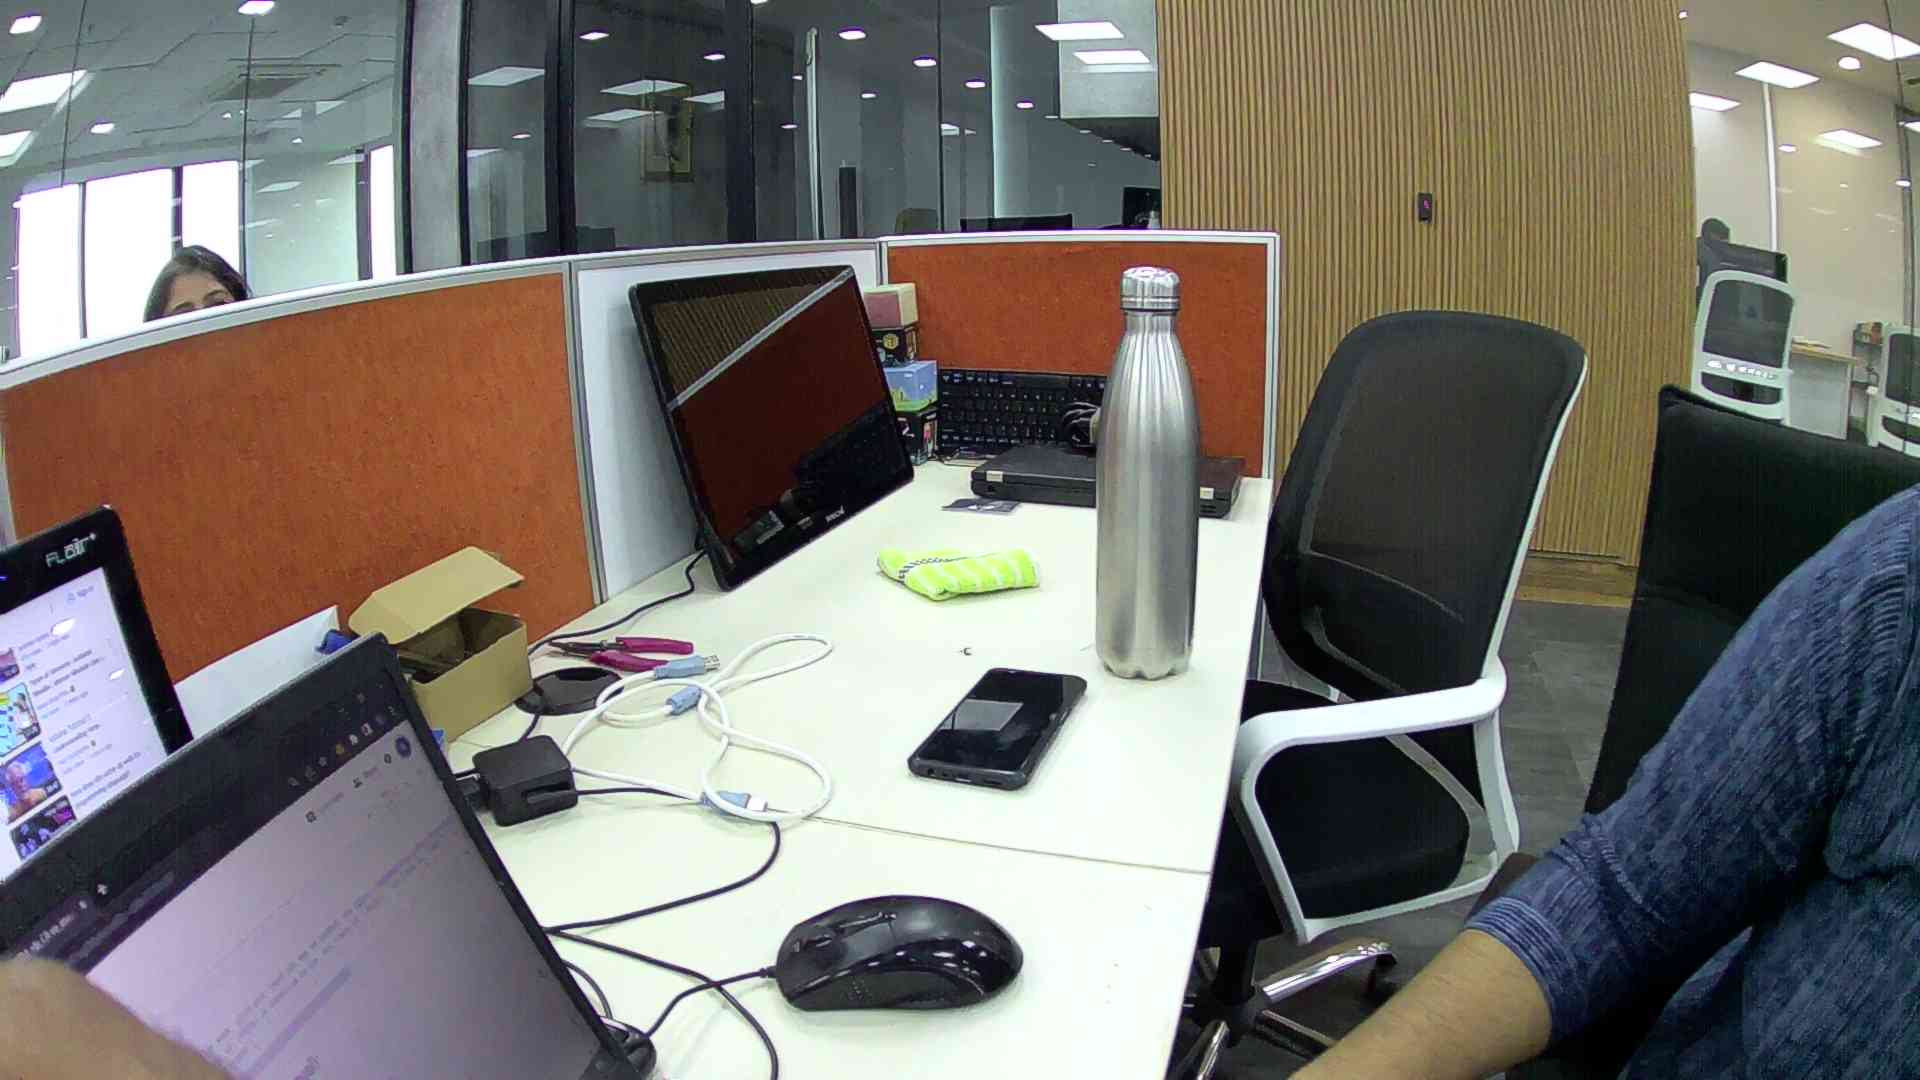

In [ ]:

from IPython.display import display

# Load the image
image_path = "image0.jpg"  # Replace with the path to your image
image = Image.open(image_path)

# Display the original image
display(image)

In [ ]:
predict_step(['image0.jpg'])

['a person sitting at a desk in front of a laptop computer']

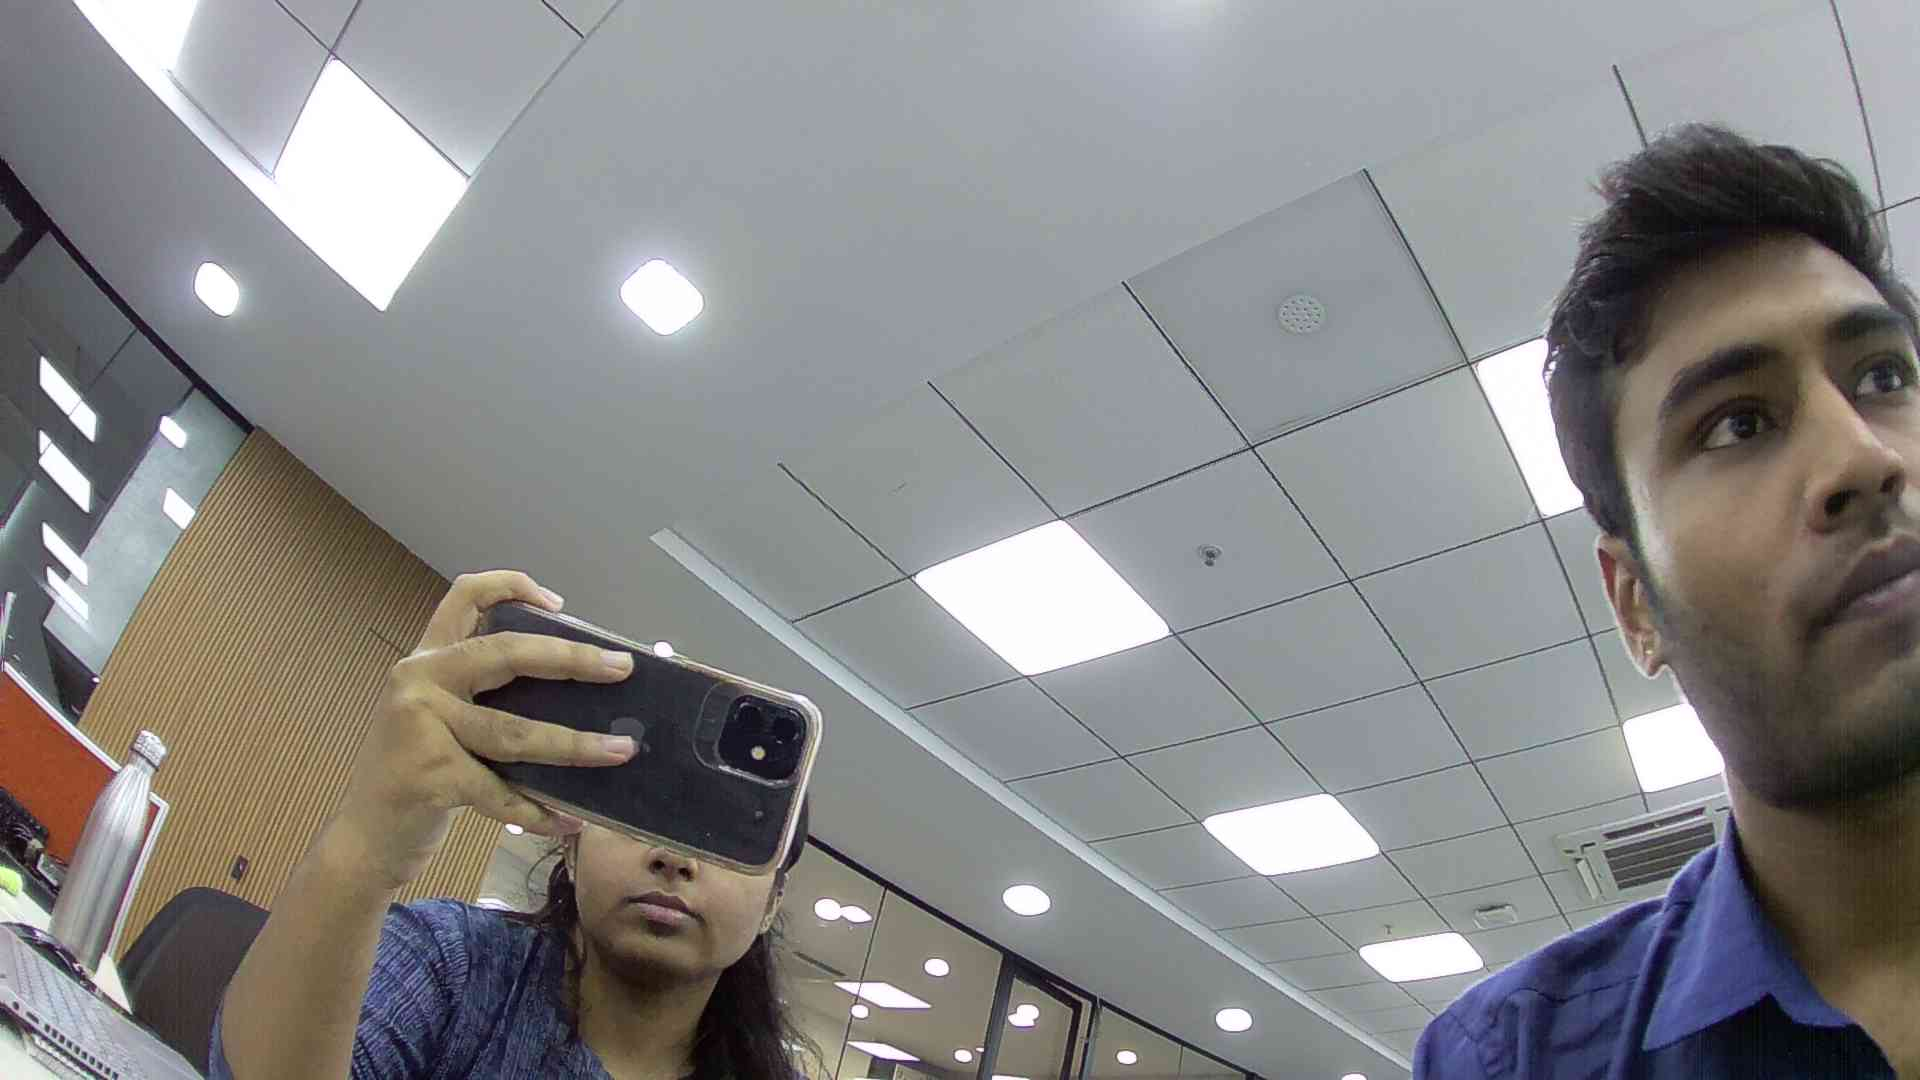

In [ ]:

image_path = "image1.jpg"  # Replace with the path to your image
predict_step([image_path])
image = Image.open(image_path)

# Display the original image
display(image)

In [ ]:
predict_step(['image1.jpg'])

['a man taking a picture of himself in a mirror']

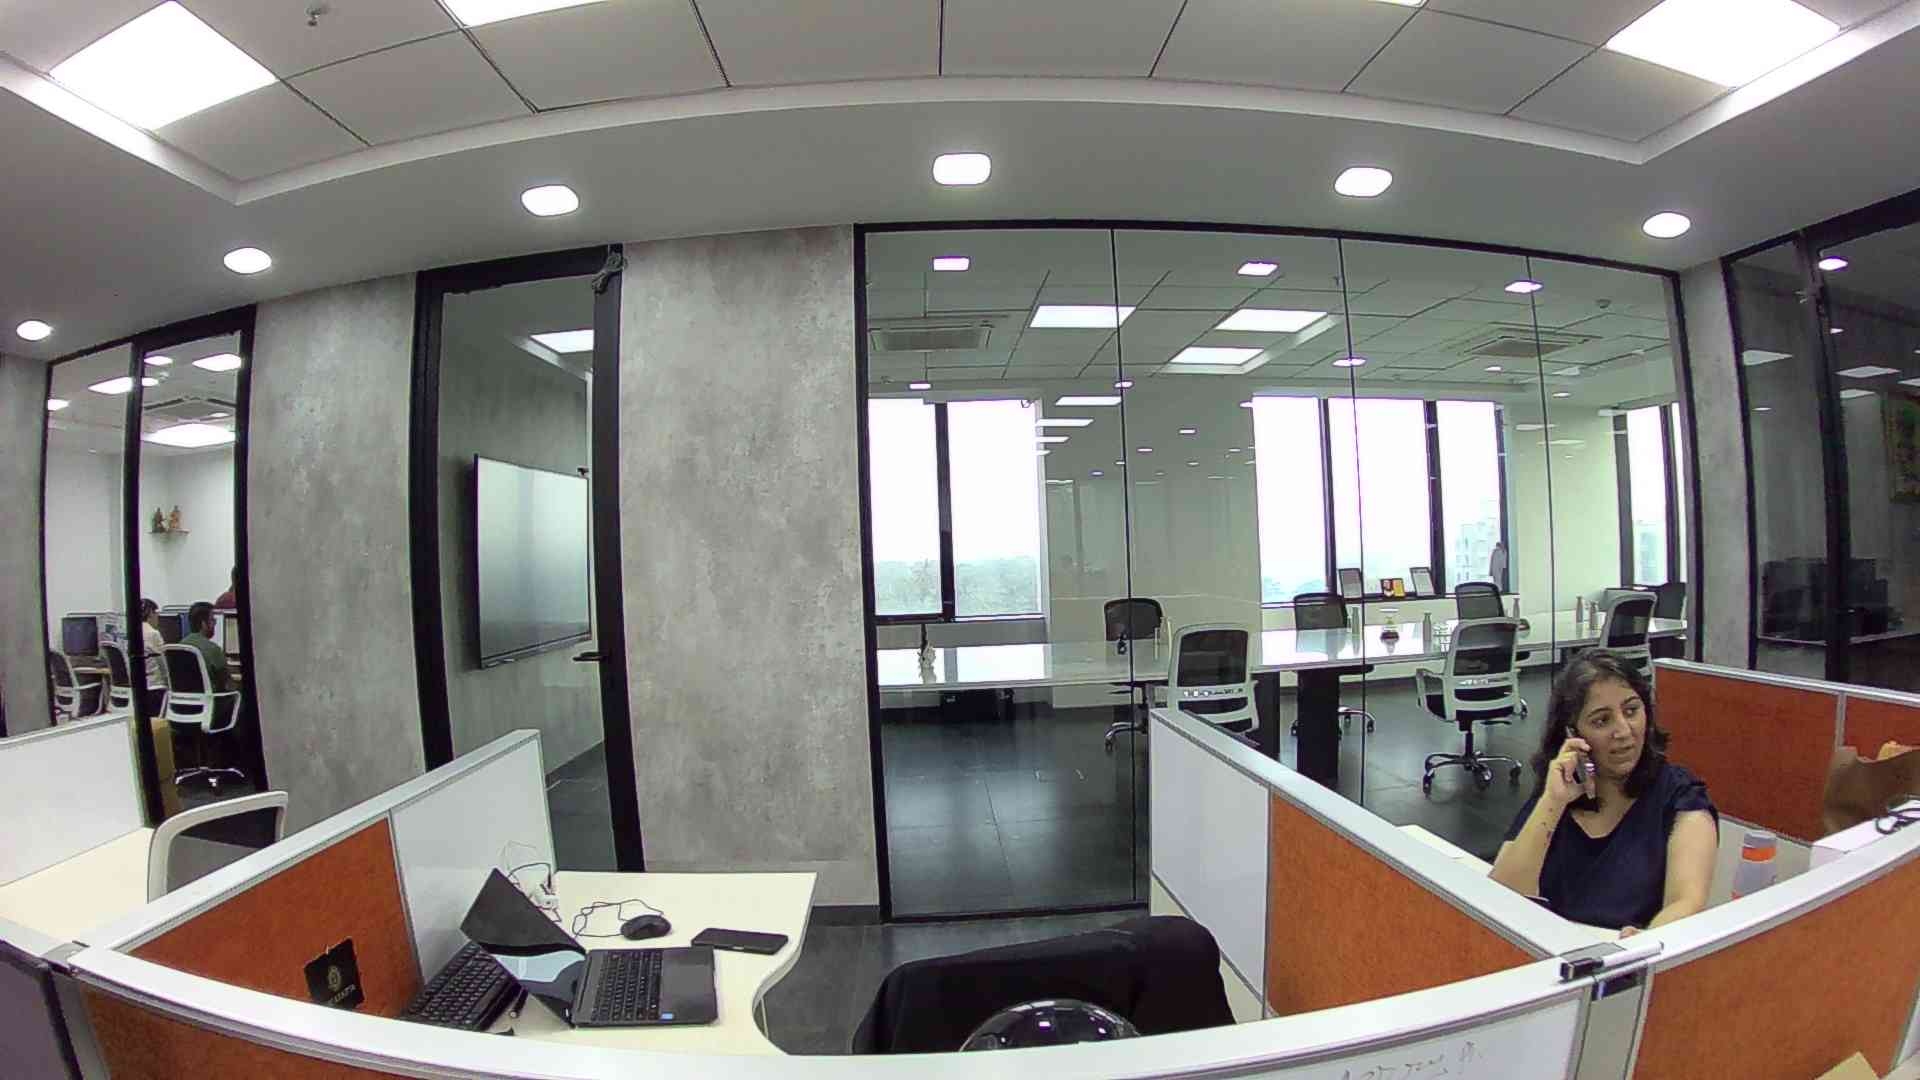

In [ ]:

image_path = "image2.jpg"  # Replace with the path to your image
predict_step([image_path])
image = Image.open(image_path)

# Display the original image
display(image)

In [ ]:
predict_step([image_path])

['a large room with a lot of windows and a lot of people']

# **IP: IMAGE CAPTURED THROUGH AMB82 MINI CAMERA**
# **OP: BASE64 OF THE IMAGE**

In [ ]:
import base64

# Your text string
text_to_encode = "jana"

# Convert text to Base64
base64_encoded = base64.b64encode(text_to_encode.encode()).decode()

# Display the original text and the Base64 encoded string
print("Original Text:", text_to_encode)
print("Base64 Encoded:", base64_encoded)


Original Text: jana
Base64 Encoded: amFuYQ==


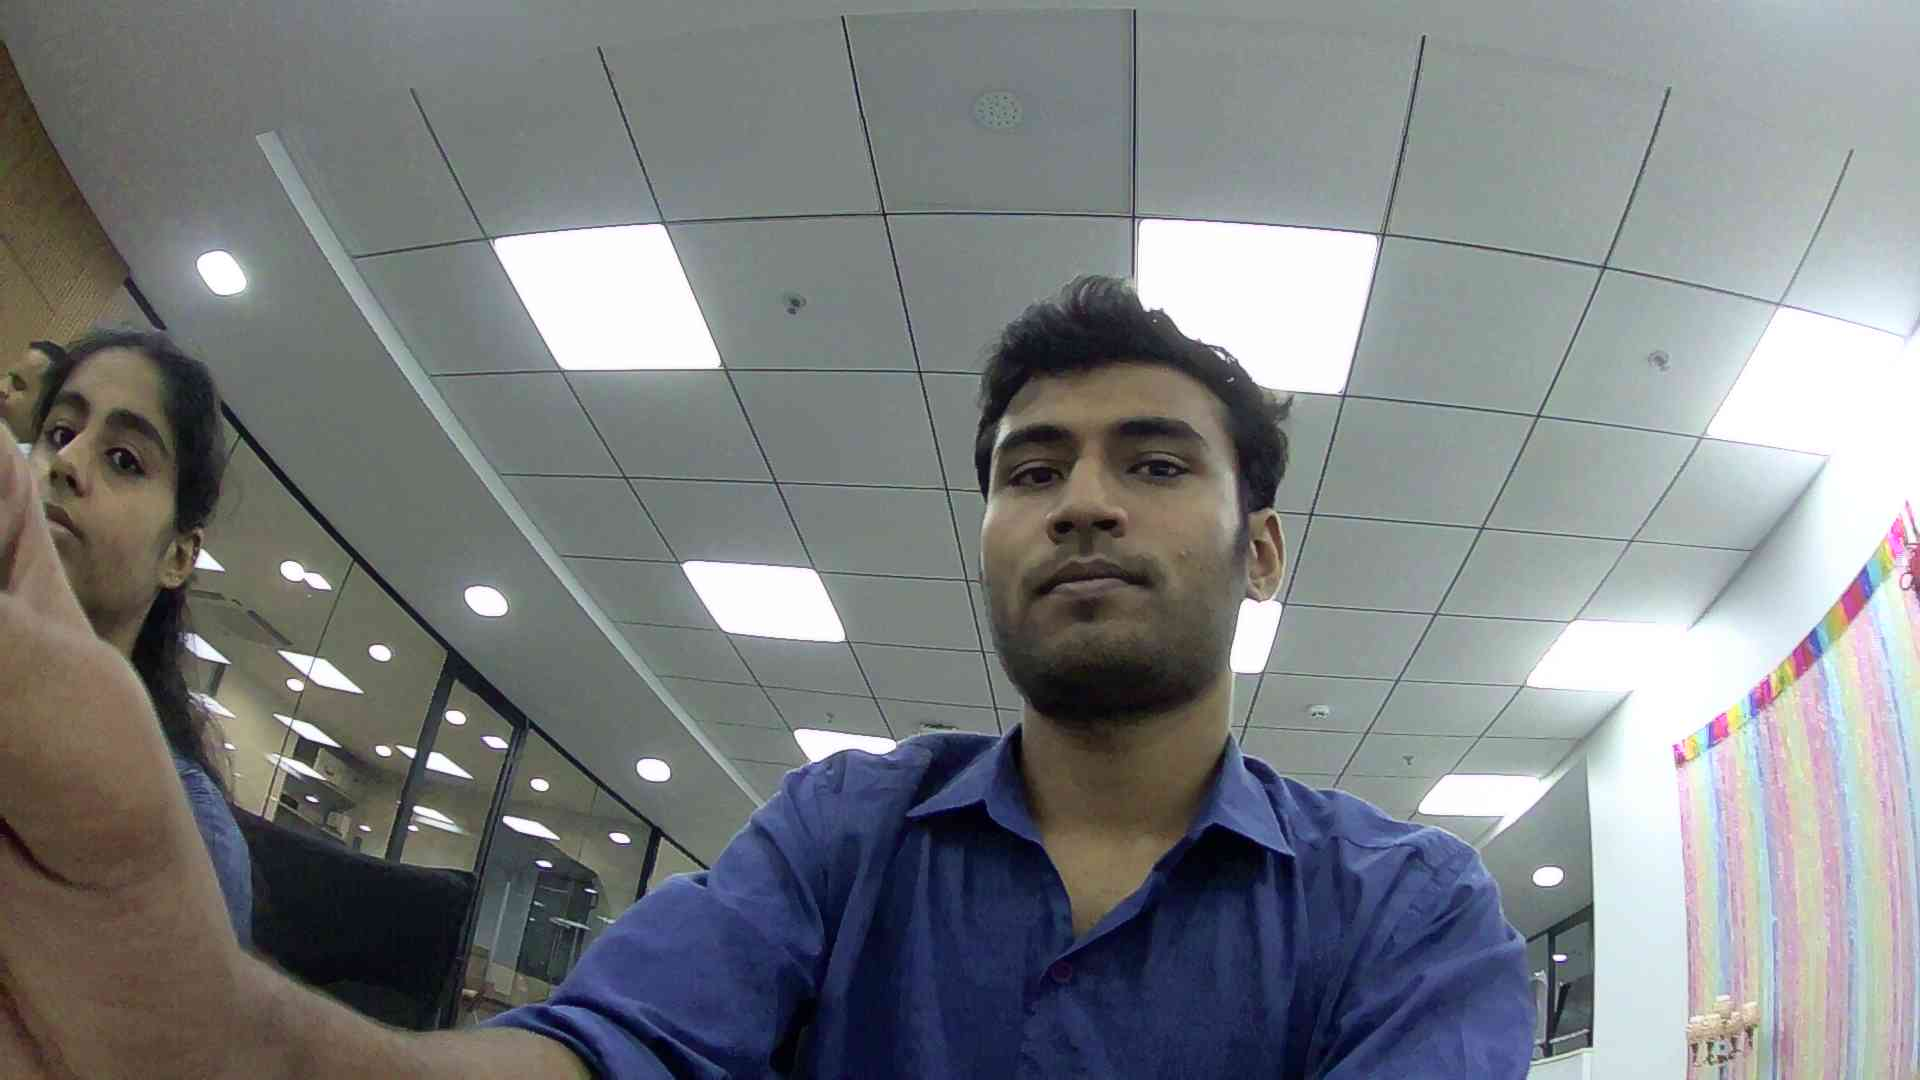

'/9j/4AAQSkZJRgABAgAAAQABAAD/2wBDABsSFBcUERsXFhceHBsgKEQsKCYmKFQ6PjBEYFhoZGBYYFxseKCIbHSQdFxgiLiIkKCosLCwaIDA0MCoyKCosKj/2wBDARweHigkKFAsLFCocGBwqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKj/wAARCAQ4B4ADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwCoBRQDRSAWlFJQKAHUnpRS0AFFAPNKKADvQKO9FABS0maDTAWjpQKWkITNLRR9KBhRQaKYBRRS0AJ9aWiigAoo49aKBC80GkozQMWikpaBBQKBRQAp9qSiigYtFFFAgooFFMApaSloAKKSlpAFHeiimAUUUUALmigUd6AClpK

In [ ]:
import base64
from PIL import Image
from IPython.display import display

# Load the image
image_path = "test1.jpeg"  # Replace with the path to your image
image = Image.open(image_path)

# Display the original image
display(image)

# Convert image to Base64
with open(image_path, "rb") as image_file:
    base64_encoded = base64.b64encode(image_file.read()).decode()

# Display the Base64 encoded string
base64_encoded


In [ ]:
import base64

def string_to_base64_details(input_string):
    # Step 0: Print Original String and Binary Equivalent for Each Letter
    print(f"Original String: {input_string}")
    binary_equivalents = [format(ord(char), '08b') for char in input_string]
    print("Binary Equivalent for Each Letter:")
    for char, binary in zip(input_string, binary_equivalents):
        print(f"   {char}: {binary}")

    # Step 1: Convert Characters to ASCII
    ascii_values = [ord(char) for char in input_string]

    # Step 2: Convert ASCII to Binary
    binary_data = ''.join(format(value, '08b') for value in ascii_values)
    print(f"\nBinary Representation of the Entire String: {binary_data}")

    # Step 3: Group into 6-bit Chunks
    chunks = [binary_data[i:i+6] for i in range(0, len(binary_data), 6)]
    print(f"\nGrouping into 6-bit Chunks during Base64 Conversion:")
    for chunk in chunks:
        print(f"   {chunk}", end=" ")

    #Step 4: Convert 6-bit Chunks to Decimal and Print Base64 Equivalent
    print(f"\n\nBase64 Equivalent of Each 6-bit Chunk:")
    for chunk in chunks:
        decimal_value = int(chunk, 2)
        base64_char = base64.b64encode(bytes([decimal_value])).decode()
        print(f"   {decimal_value} -> {base64_char}", end=" ")

    # Step 7: Combine Characters
    base64_encoded_string = base64.b64encode(input_string.encode()).decode()
    print(f"\n\nBase64 Equivalent of the Entire String: {base64_encoded_string}")

# Example usage
input_string = "sanjana"
string_to_base64_details(input_string)


Original String: sanjana
Binary Equivalent for Each Letter:
   s: 01110011
   a: 01100001
   n: 01101110
   j: 01101010
   a: 01100001
   n: 01101110
   a: 01100001

Binary Representation of the Entire String: 01110011011000010110111001101010011000010110111001100001

Grouping into 6-bit Chunks during Base64 Conversion:
   011100    110110    000101    101110    011010    100110    000101    101110    011000    01 

Base64 Equivalent of Each 6-bit Chunk:
   28 -> HA==    54 -> Ng==    5 -> BQ==    46 -> Lg==    26 -> Gg==    38 -> Jg==    5 -> BQ==    46 -> Lg==    24 -> GA==    1 -> AQ== 

Base64 Equivalent of the Entire String: c2FuamFuYQ==
